In [12]:
# 실습에 필요한 패키지들을 불러옵니다.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [13]:
# 사이킷런에서 보스턴 주택 가격 데이터 세트를 가져옵니다.
dataset = datasets.load_boston()

# 입력 데이터와 타깃을 준비합니다.
X, y = dataset['data'], dataset['target']

# 데이터 세트를 학습 세트와 테스트 세트로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# 데이터 범위 조정을 위해 표준화 객체를 생성합니다.
scaler = StandardScaler()

# 표준화 객체를 학습시킵니다.
scaler.fit(X_train)

# 학습 세트와 테스트 세트에 각각 표준화를 적용합니다.
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [19]:
# K-최근접 이웃 모델 객체를 만듭니다.
model = KNeighborsRegressor(n_neighbors=5)

# K-최근접 이웃 모델에 학습 세트의 입력 데이터와 타깃을 넣고 학습시킵니다.
model.fit(X_train_std, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [20]:
# 학습 세트에서의 결정계수와 테스트 세트에서의 결정계수를 계산합니다.
train_score = model.score(X_train_std, y_train)
test_score = model.score(X_test_std, y_test)

# 학습 세트에서의 결정계수와 테스트 세트에서의 경정계수를 출력합니다.
print('학습 세트 결정계수: {score:.3f}'.format(score=train_score))
print('테스트 세트 결정계수: {score:.3f}'.format(score=test_score))

학습 세트 결정계수: 0.826
테스트 세트 결정계수: 0.808


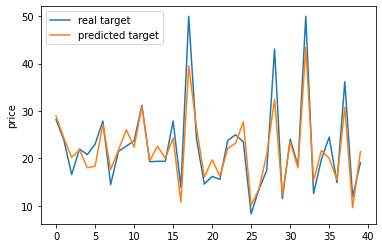

In [21]:
# 학습된 모델에 테스트 세트의 입력 데이터를 다시 넣고 타깃을 예측합니다.
y_predicted = model.predict(X_test_std)

# 실제값과 예측값 사이의 관계를 꺾은선 그래프로 그립니다.
number_of_sample = 40
plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('price')
plt.legend()
plt.show()